#Diabetes Prediction


Diabetes is a chronic medical condition characterized by elevated levels of glucose (sugar) in the blood due to either insufficient insulin production or ineffective use of insulin by the body.

##Objective

We will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not

#Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from google.colab import files
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

#Set the Dataset

In [ ]:
uploaded = files.upload()

Saving diabetes.csv to diabetes (6).csv


#The Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

`The features:`
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration from an oral tolerance test
- Blood Glucose:  Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (kg/m2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

#Load

load csv file diabetes.csv

In [ ]:
df = pd.read_csv('diabetes.csv')

#Inspecting Data

Get the first five lines

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


There are 768 lines

In [ ]:
df.shape

(768, 9)

Inspecting if there is a column with a string dtype

In [ ]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

There are no null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Cleaning

## Duplicates

In [ ]:
df.duplicated().sum()

0

No Duplicates

## Missing Values

In [ ]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:

columns_without_target_col = df.columns[:-1]
columns_with_missing_vals = []
total_ms_vals = 0
for column in columns_without_target_col:
    ms_vals = len(df.loc[df[column] == 0, column])
    total_ms_vals += ms_vals
    print(f"{ms_vals / len(df[column]):>5.1%} Missing values in the {column} column ({ms_vals} values)")
    if ms_vals > 0:
        columns_with_missing_vals.append(column)

print(f"------\nTotal Missing values in the dataset : {total_ms_vals / df[columns_without_target_col].size:.0%} ({total_ms_vals}/{df[columns_without_target_col].size}) ")


14.5% Missing values in the Pregnancies column (111 values)
 0.7% Missing values in the Glucose column (5 values)
 4.6% Missing values in the BloodPressure column (35 values)
29.6% Missing values in the SkinThickness column (227 values)
48.7% Missing values in the Insulin column (374 values)
 1.4% Missing values in the BMI column (11 values)
 0.0% Missing values in the DiabetesPedigreeFunction column (0 values)
 0.0% Missing values in the Age column (0 values)
------
Total Missing values in the dataset : 12% (763/6144) 


# Data Visualization

## Histogram of features

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

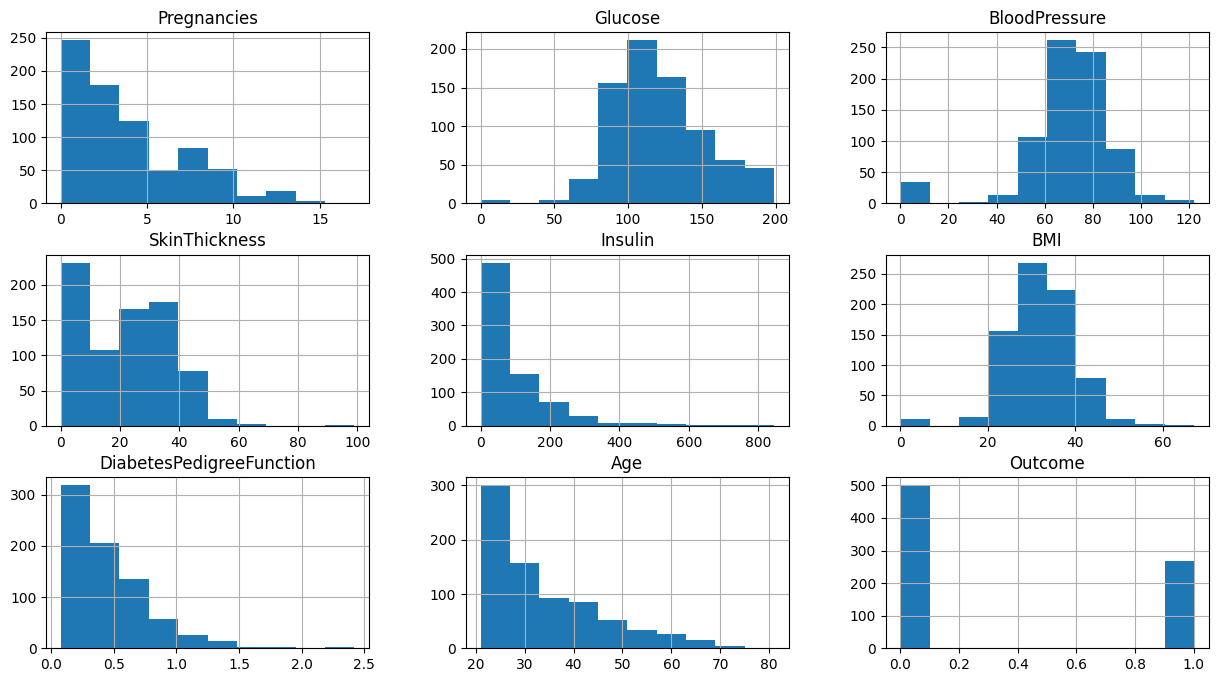

In [ ]:
df.hist(figsize=(15,8))

## Correlation

<Axes: >

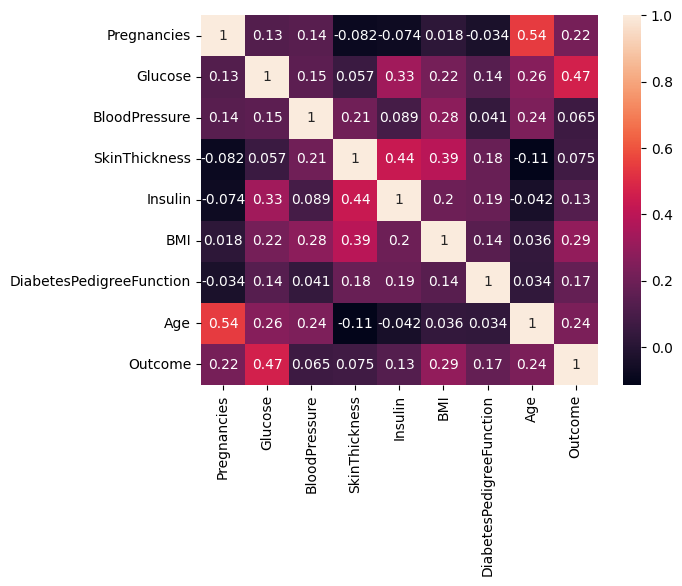

In [ ]:
#heatmap
correlation = df.corr()
sns.heatmap(correlation, annot=True)

We notice that the highest correlations with the Outcome are:
- Glucose
- BMI
- Age
Whilst Skin Thickness and Blood Pressure are almost unimportant

## Outcome Distribution

There is an imbalance of 15%:
- 34.9% don't have diabetes
- 65.1% have diabetes

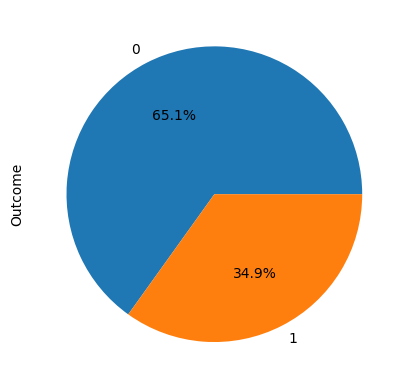

In [ ]:
a = df['Outcome'].value_counts().plot.pie( autopct='%1.1f%%')
plt.show('Distribution of Diabetes')


## Boxplots

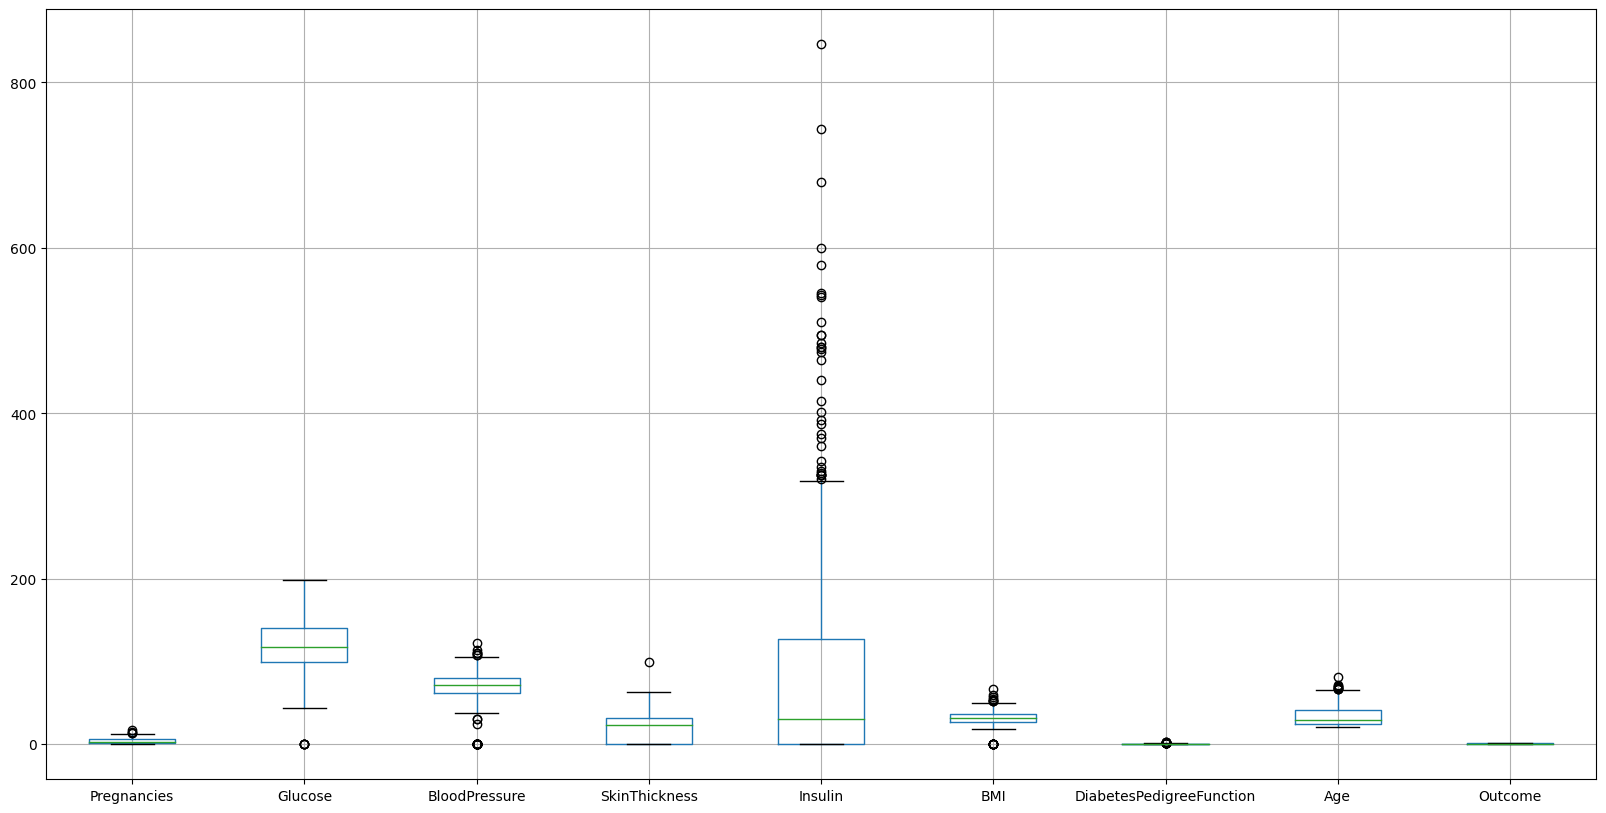

In [ ]:
df.boxplot(figsize=(20, 10))
plt.show()

Comparison between Diabetic people and Non-Diabetics:

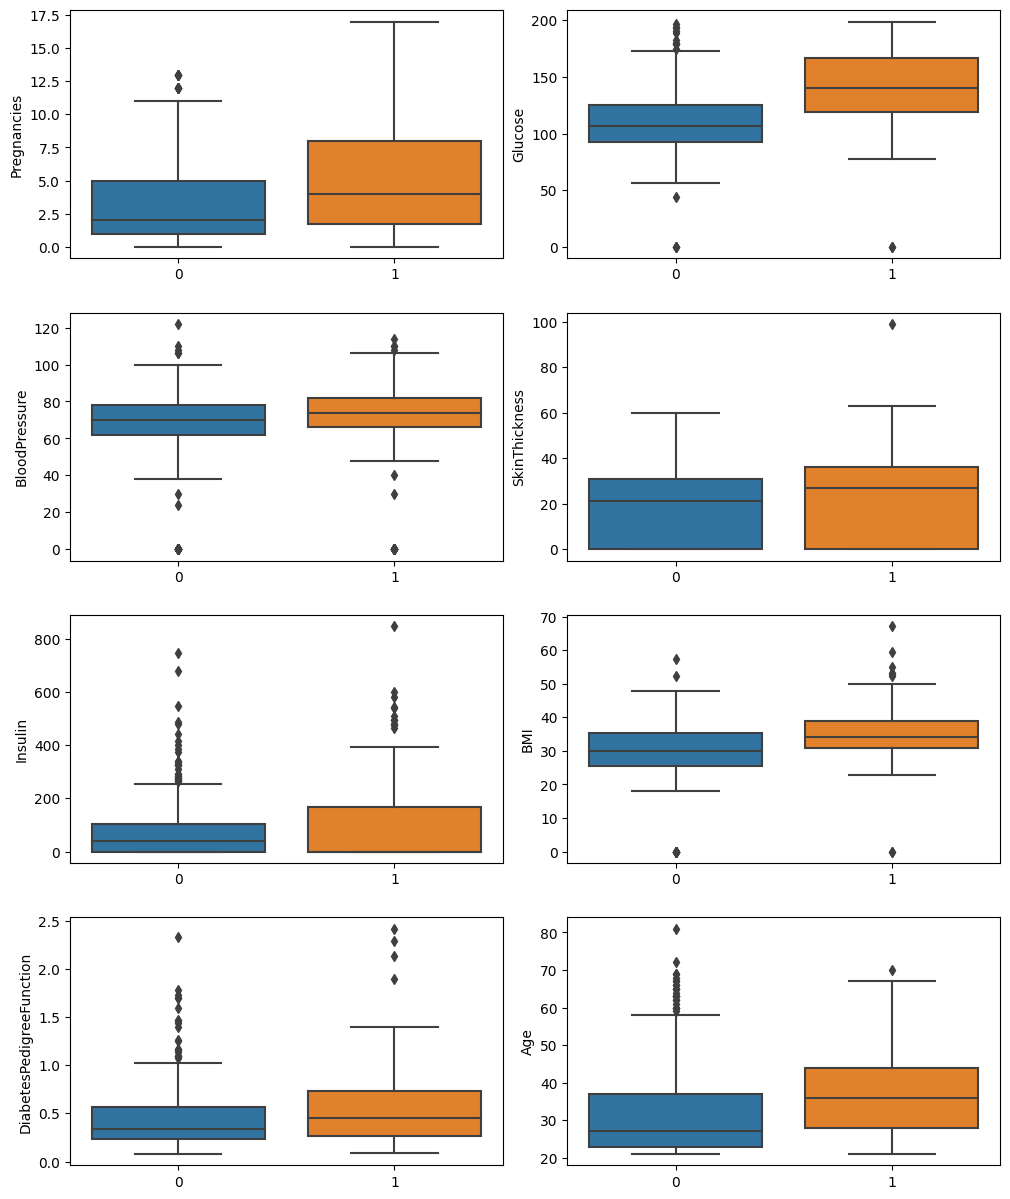

In [ ]:

fig = plt.figure(figsize=(12, 15))

for i, col in enumerate(columns_without_target_col):
    ax = fig.add_subplot(len(columns_without_target_col) // 2, 2, i + 1)
    sns.boxplot(data=df, y=col, x='Outcome', ax=ax )
    ax.set_xlabel("")

plt.subplots_adjust(hspace=0.22, wspace=0.15)
plt.show()


Diabetics are/have more:
- Glucose
- Pregnancies
- Age

In [ ]:
features = df.drop(columns=['Outcome'])

In [ ]:
features.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


# Model Building


## Normalizing Features

In [ ]:
y = df['Outcome']

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X = scaler.fit_transform(features)

In [ ]:
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

## Split Train/Test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## Fix Imbalencement

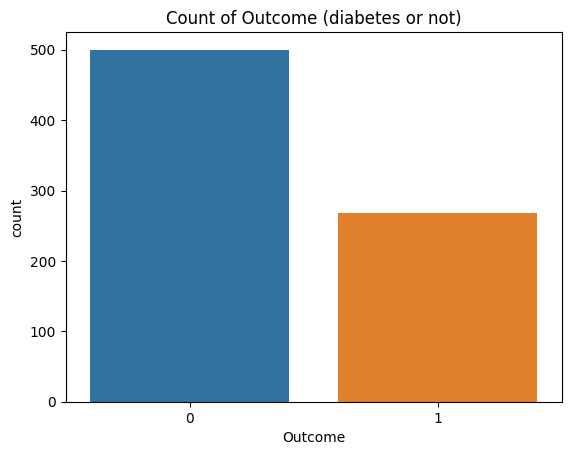

In [ ]:
sns.countplot(x='Outcome', data=df)  #data=df_diabetes_train)
plt.title("Count of Outcome (diabetes or not)")
plt.show()


In [ ]:
#df_copy = pd.DataFrame(X,columns=df.columns[:-1])
#df_copy['Outcome'] = y

In [ ]:
def balance_data_with_smote(X, y, target_column):
    #X = df.drop(columns=['Outcome'])
    #y = df['Outcome']
    X,y = SMOTE().fit_resample(X,y)
    res = pd.DataFrame(X,columns=df.columns[:-1])
    res['Outcome'] = y
    return res

balanced_df = balance_data_with_smote(X_train,y_train, 'Outcome')

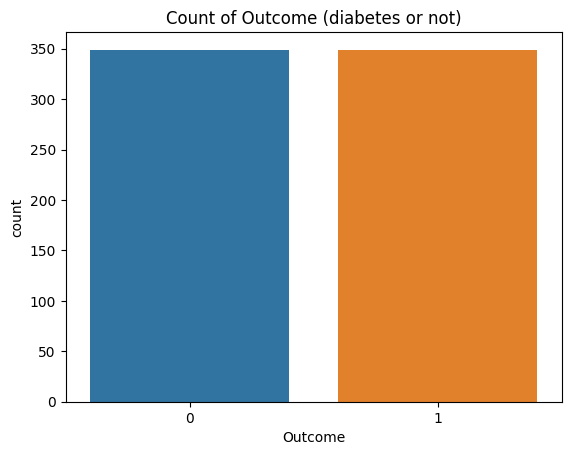

In [ ]:
sns.countplot(x='Outcome', data=balanced_df)  #data=df_diabetes_train)
plt.title("Count of Outcome (diabetes or not)")
plt.show()

## KNN Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
X_train_balanced = balanced_df.drop(columns=['Outcome'])
y_train_balanced = balanced_df['Outcome']

In [ ]:
A = knn.fit(X_train_balanced,y_train_balanced)
B = knn.fit(X_train,y_train)

In [ ]:
y_pred_A = A.predict(X_test)
y_pred_B = B.predict(X_test)

In [ ]:
y_pred

array([0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
confusion_matrix(y_test,y_pred_A)

array([[112,  39],
       [ 36,  44]])

In [ ]:
confusion_matrix(y_test,y_pred_B)

array([[112,  39],
       [ 36,  44]])

In [ ]:
print(classification_report(y_test,y_pred_A))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       151
           1       0.53      0.55      0.54        80

    accuracy                           0.68       231
   macro avg       0.64      0.65      0.64       231
weighted avg       0.68      0.68      0.68       231



In [ ]:
print(classification_report(y_test,y_pred_B))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       151
           1       0.53      0.55      0.54        80

    accuracy                           0.68       231
   macro avg       0.64      0.65      0.64       231
weighted avg       0.68      0.68      0.68       231



In [ ]:
import numpy as np

In [ ]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)

    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

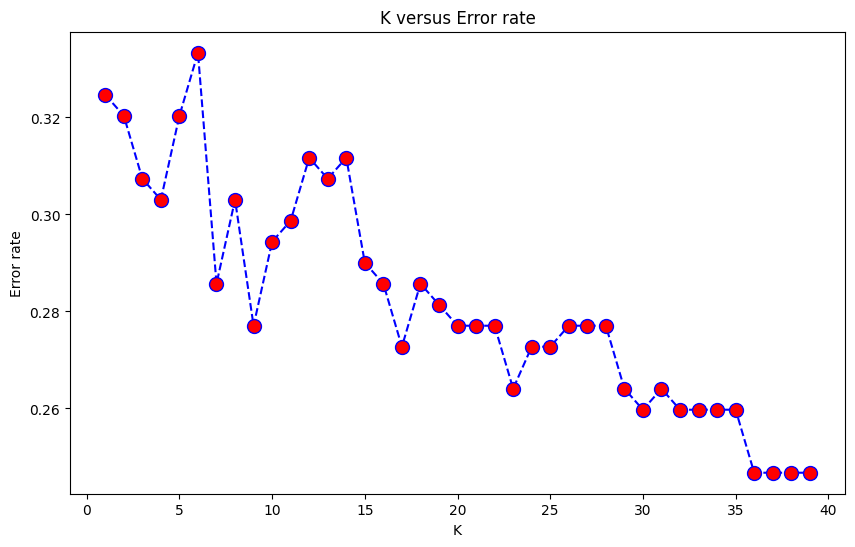

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(range(1, 40), error_rate, color='blue', linestyle='--', markersize=10, markerfacecolor='red', marker='o')

plt.title('K versus Error rate')

plt.xlabel('K')
plt.ylabel('Error rate')

In [ ]:
#lowest error rate at 36

In [ ]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[112  39]
 [ 36  44]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       151
           1       0.53      0.55      0.54        80

    accuracy                           0.68       231
   macro avg       0.64      0.65      0.64       231
weighted avg       0.68      0.68      0.68       231

